# Noshow Classification

------------------
## Introdution
**Problem Statement**: 
Given a dataset of patient records, preprocess, train and test machine learning models that can effectively categorize if a patient will show up for their appointment or not

**Process**:
To solve this problem, we go through the following steps:
- [Initialization](#Initialization)
- [Initial Exploratory Data Analysis (EDA)](#Initial-EDA)
- [Preprocessing](#Preprocessing)
- [Post-processing EDA](#Post-Processing-EDA)
- [Training, Testing and Validation](#Training-Testing-and-Validation)
- [Testing Custom Data](#Testing-Custom-Data)

-----------
## Initialization
We import all necessary modules and data. We also start a timer to keep track of overall execution time

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statistics import mean
import scipy.stats as stats
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from faker import Faker
import random

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [2]:
total_start = time.time()
df = pd.read_csv("noshow_data_v2 (1).csv")

----------------------
## Initial EDA
We perform basic EDA to learn the basic structure and contents of our dataset. We also visualize trends that may be present, to help us better preprocess our data.

In [3]:
#Exploratory Data Analysis
print("Head:")
display(df.head(10))
print("=========================")
print("Info:",df.info(),"=========================")
print("Description:")
display(df.describe())
print("=========================")
print("Null values\n", df.isnull().sum(),"\n=========================")
print("Dupicates:", df.duplicated().sum(),"\n=========================")

Head:


,Patient_Id,Gender,Scheduled_Date,Appointment_Date,Appointment_time,Age,Hipertension,Diabetes,Alcoholism,Handcap,...,Clinic_Location,Doctor_Id,Scheduled_Day,Appointment_Day,Appointment_Type,Channel,Cancelled,Rate_Of_Cancellation,Day_Difference,Appointment_Hour
0,299000.0,F,2016-04-29,2016-04-29,22:05:00,62,1,0,0,0,...,Noida,4000,Friday,Friday,Follow-up Visit,Call,1,0.666667,0 days,22
1,5590000.0,M,2016-04-29,2016-04-29,21:32:00,56,0,0,0,0,...,Pune,1000,Friday,Friday,New Patient,Web Portal,1,0.555556,0 days,21
2,42600.0,F,2016-04-29,2016-04-29,21:46:00,62,0,0,0,0,...,Coimbatore,1000,Friday,Friday,New Patient,Call,0,0.545455,0 days,21
3,8680.0,F,2016-04-29,2016-04-29,18:08:00,8,0,0,0,0,...,Pune,2000,Friday,Friday,Follow-up Visit,Web Portal,0,0.589744,0 days,18
4,88400.0,F,2016-04-29,2016-04-29,20:22:00,56,1,1,0,0,...,Pune,3000,Friday,Friday,New Patient,Mobile Application,1,0.535714,0 days,20
5,960000.0,F,2016-04-27,2016-04-29,12:39:00,76,1,0,0,0,...,Noida,5000,Wednesday,Friday,New Patient,Mobile Application,1,0.484848,2 days,12
6,7340000.0,F,2016-04-27,2016-04-29,17:30:00,23,0,0,0,0,...,Bengaluru,1000,Wednesday,Friday,Follow-up Visit,Web Portal,0,0.612903,2 days,17
7,34500.0,F,2016-04-27,2016-04-29,15:50:00,39,0,0,0,0,...,Chennai,4000,Wednesday,Friday,New Patient,Mobile Application,1,0.583333,2 days,15
8,564000.0,F,2016-04-29,2016-04-29,17:40:00,21,0,0,0,0,...,Bengaluru,5000,Friday,Friday,Follow-up Visit,Mobile Application,0,0.573770,0 days,17
9,781000.0,F,2016-04-27,2016-04-29,15:58:00,19,0,0,0,0,...,Pune,5000,Wednesday,Friday,New Patient,Web Portal,0,0.521739,2 days,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51173 entries, 0 to 51172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Id            51173 non-null  float64
 1   Gender                51173 non-null  object 
 2   Scheduled_Date        51173 non-null  object 
 3   Appointment_Date      51173 non-null  object 
 4   Appointment_time      51173 non-null  object 
 5   Age                   51173 non-null  int64  
 6   Hipertension          51173 non-null  int64  
 7   Diabetes              51173 non-null  int64  
 8   Alcoholism            51173 non-null  int64  
 9   Handcap               51173 non-null  int64  
 10  Noshow                51173 non-null  object 
 11  Employment            51173 non-null  object 
 12  Location              51173 non-null  object 
 13  Clinic_Location       51173 non-null  object 
 14  Doctor_Id             51173 non-null  int64  
 15  Scheduled_Day      

,Patient_Id,Age,Hipertension,Diabetes,Alcoholism,Handcap,Doctor_Id,Cancelled,Rate_Of_Cancellation,Appointment_Hour
count,5.117300e+04,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000
mean,1.494935e+06,36.808317,0.202724,0.069255,0.035136,0.022707,3000.781662,0.603131,0.603500,16.626620
std,2.582909e+06,23.078810,0.402033,0.253890,0.184125,0.161435,1416.946716,0.489253,0.092290,3.867088
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,6.000000
25%,4.250000e+04,17.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.552632,14.000000
50%,3.180000e+05,37.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,1.000000,0.606061,17.000000
75%,9.480000e+05,55.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1.000000,0.655172,20.000000
max,1.000000e+07,98.000000,1.000000,1.000000,1.000000,3.000000,5000.000000,1.000000,1.000000,22.000000


Null values
 Patient_Id              0
Gender                  0
Scheduled_Date          0
Appointment_Date        0
Appointment_time        0
Age                     0
Hipertension            0
Diabetes                0
Alcoholism              0
Handcap                 0
Noshow                  0
Employment              0
Location                0
Clinic_Location         0
Doctor_Id               0
Scheduled_Day           0
Appointment_Day         0
Appointment_Type        0
Channel                 0
Cancelled               0
Rate_Of_Cancellation    0
Day_Difference          0
Appointment_Hour        0
dtype: int64 
Dupicates: 0 


From the above overview of the dataset, we can see that there are 23 columns and 51173 entries. Most columns are non-numerical, non ordinal and have no duplicates or null entries. Mean age is 36, 20% of patients have hypertension, 6% have diabetes, and 3% have alcoholism.

In [4]:
df.dropna(inplace=True)

df['Patient_Id'] = df['Patient_Id'].astype(int)

#converting to datetime format
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
df['Appointment_time'] = pd.to_datetime(df['Appointment_time'], format='%H:%M:%S')

df['Day_Difference'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days
df['Day_Difference'] = df['Day_Difference'].astype(int)

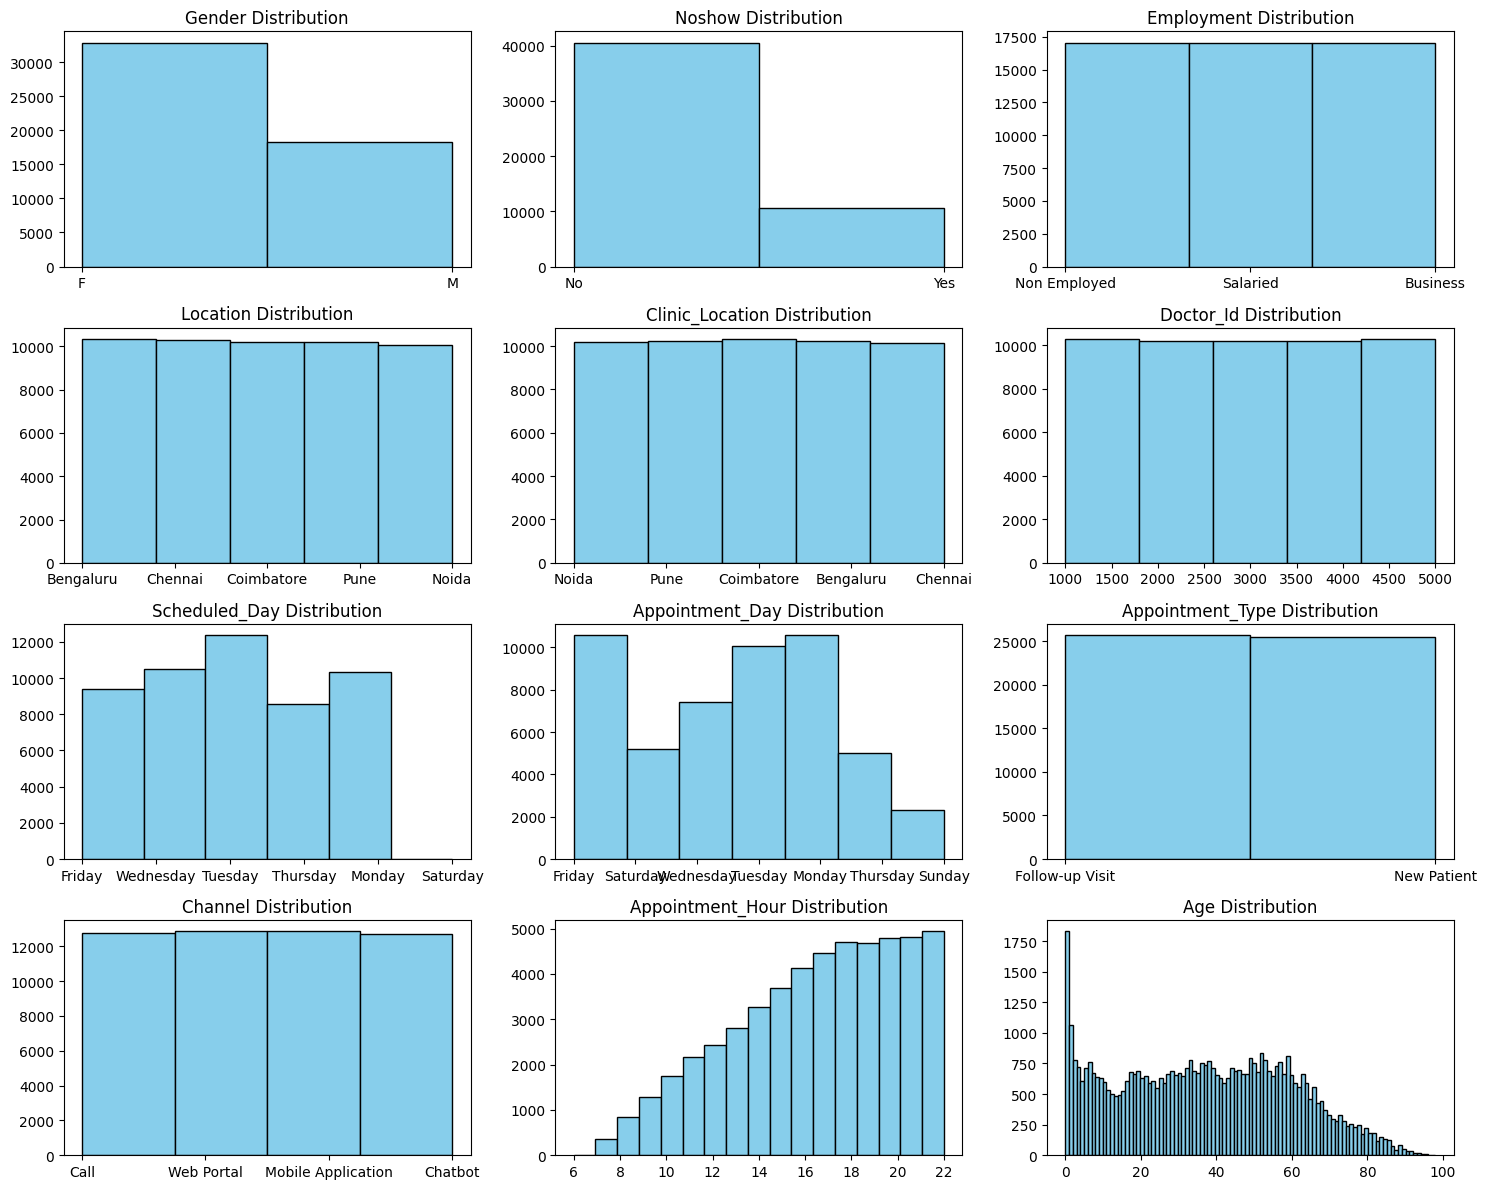

In [5]:
import matplotlib.pyplot as plt
import math

categorical_cols = ['Gender', 'Noshow', 'Employment', 'Location', 'Clinic_Location', 'Doctor_Id', 'Scheduled_Day', 'Appointment_Day', 'Appointment_Type', 'Channel']
numerical_cols = ['Patient_Id', 'Scheduled_Date','Appointment_Date', 'Appointment_time', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Cancelled', 'Rate_Of_Cancellation', 'Day_Difference', 'Appointment_Hour']

# Create a list of columns for which you want to plot histograms
plot_columns = categorical_cols + ['Appointment_Hour', 'Age']

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]    
    ax.hist(df[column], bins=len(df[column].unique()), color='skyblue', edgecolor='black')
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()

From the above, we can see that Gender is heavily skewed towards female, age has a massive spike in 0, Appointments tend to be higher into the night, there are far more 'no' entries in noshow (i.e. more people who showed up than not). Follow ups are just as much as new visits, There are more appointments on monday, tuesday and friday.

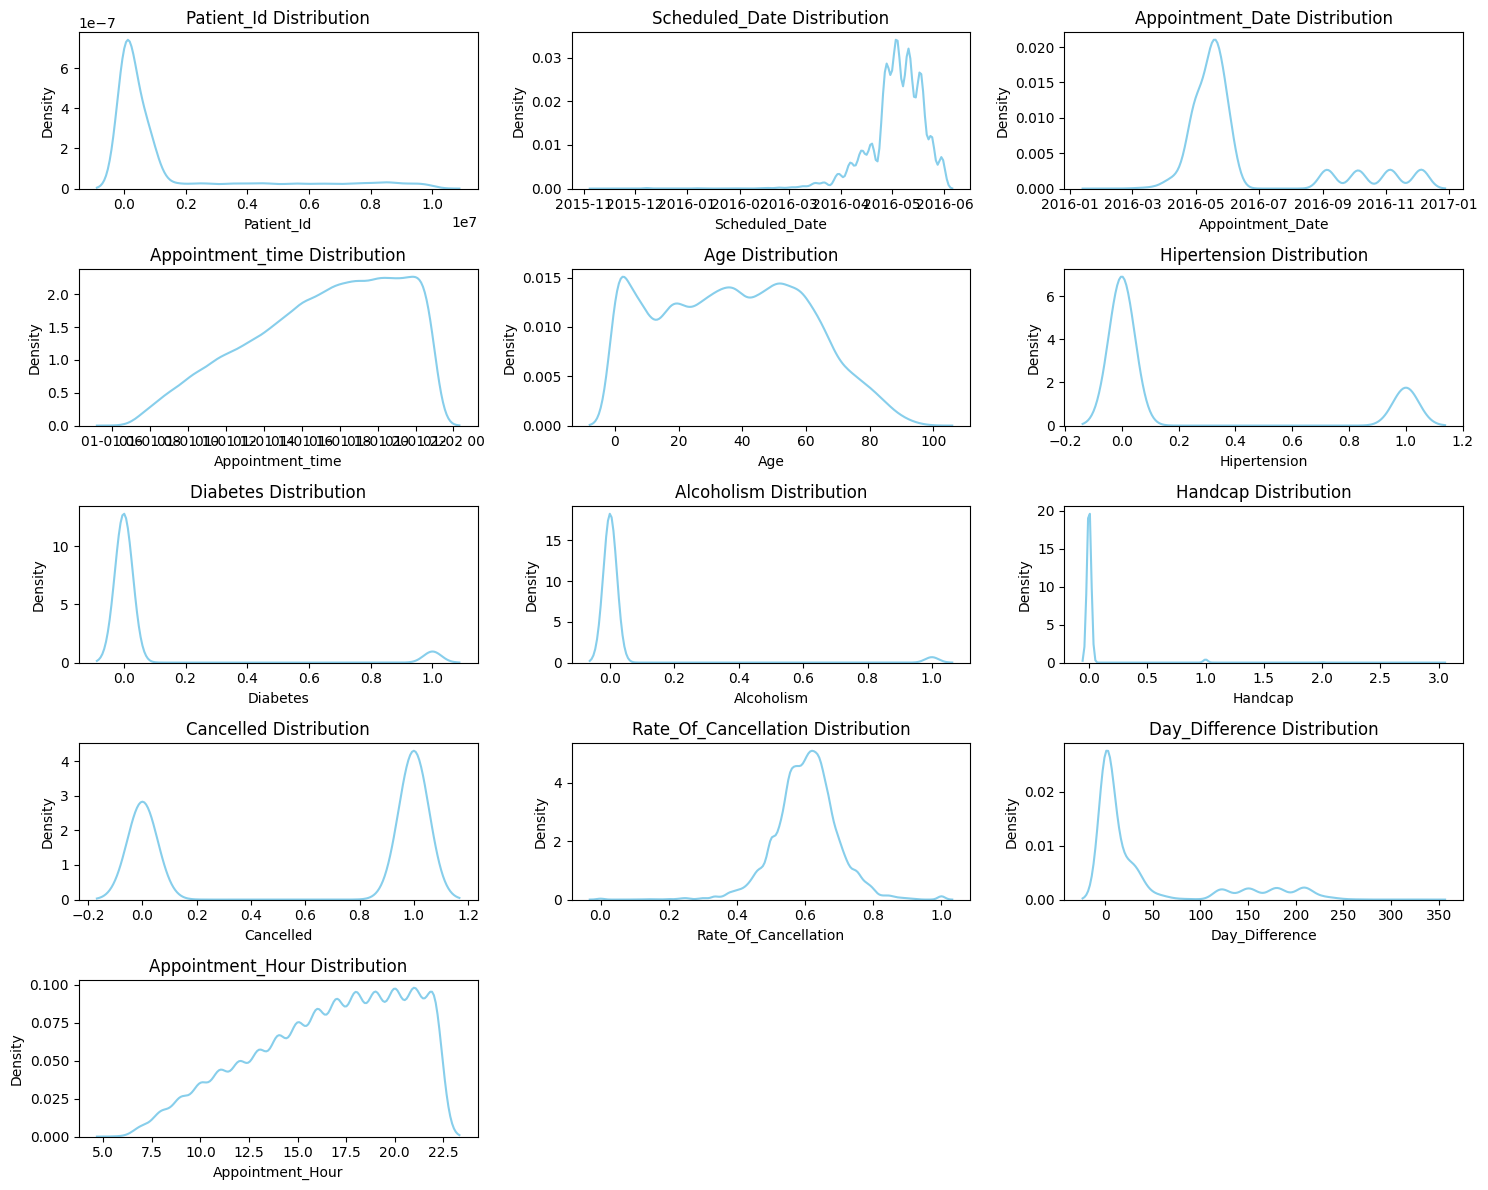

In [6]:
# Create a list of columns for which you want to plot KDE plots
plot_columns = numerical_cols

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Use Seaborn to create KDE plots
    sns.kdeplot(df[column], color='skyblue', ax=ax)
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()

From the above, we can discern that most people tend to have a rate of cancellation around 0.6, There are more cancelled appointments than non cancelled ones, and most people have very little difference between their scheduled appointment and actual appointment dates. Very few of our patients have hypertension, and fewer have diabetes. There seems to be a massive spike in appointments at 2016-5, which falls by 2016-7

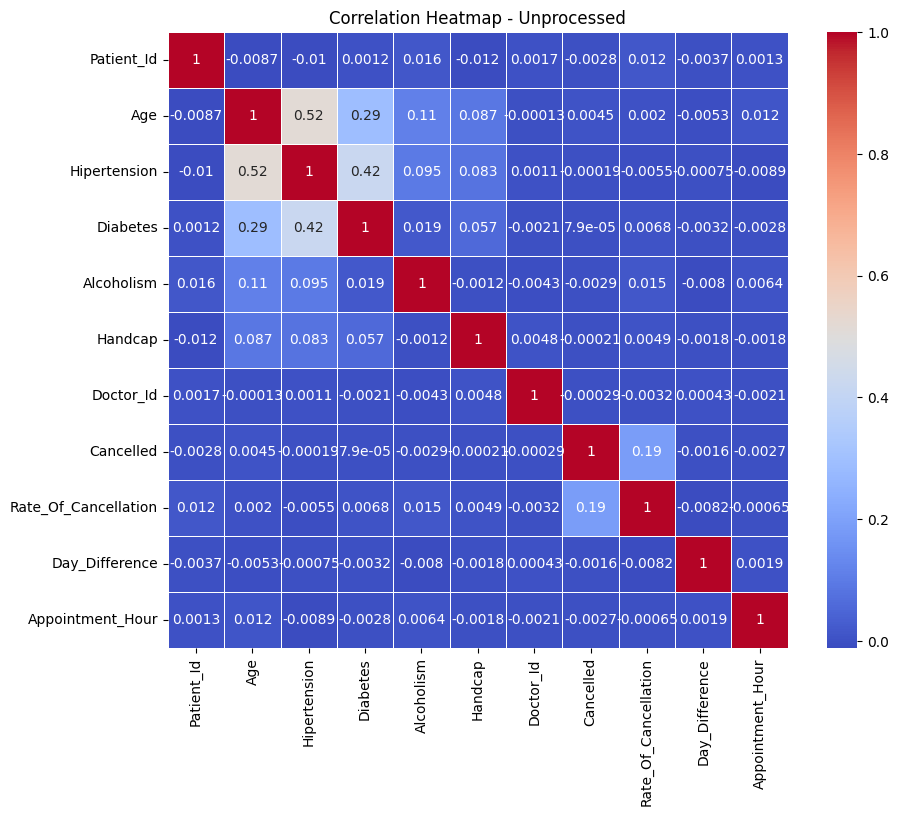

In [7]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Unprocessed')
plt.show()

The above heatmap shows us that Hypertension and age has a medium correlation of 0.52. Hypertension and diabetes has a relatively weaker correlation of 0.42, and diabetes is weakly correlated with age, at a 0.29 coefficient. There is a weak correlation between rate of cancellation and cancelled appointments, meaning people with higher cancellation rates mildly tend to cancel appointments more. The lack of all variables indicates the need to transform the categorical variables for further analysis

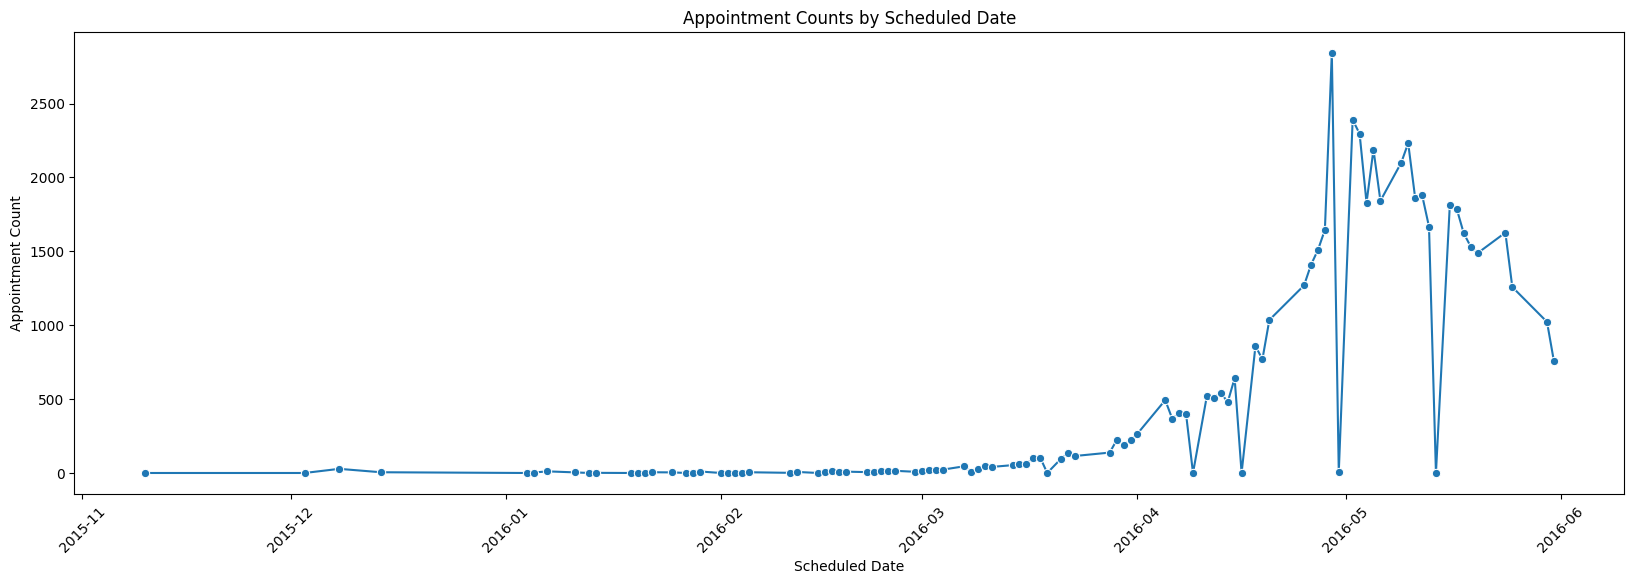

In [8]:
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])

appointment_counts_by_day = df['Scheduled_Date'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=appointment_counts_by_day, marker='o')
plt.xlabel('Scheduled Date')
plt.ylabel('Appointment Count')
plt.title('Appointment Counts by Scheduled Date')
plt.xticks(rotation=45)
plt.show()

Here we can notice a gradual increase in appointments as April 2016 begins, with some falls that rise quickly. Towards the end of april, the appointments scheduled see a massive surge to reach its peak, but suddenly falls by the time May 2016 approaches, only to pick right back up. This can be explained by a clinic-wide holiday on May 1st, May Day. The high rate of appointments continue till mid may, where a similar plummet happens. But as June approaches, rates fall to mid April levels.

----------------------------
## Preprocessing
We use our learnings of the dataset from above to process all the data to a trainable format. 

In [9]:
"""
Performs all major preprocessing tasks needed for this dataset. 
Useful when we have to reimport the data.
"""
def preprocess(df):
    df.dropna(inplace=True) 
    index_names = df[ df['Age'] == 0 ].index
    df.drop(index_names, inplace = True)

    df['Patient_Id'] = df['Patient_Id'].astype(int)

    #converting to datetime format
    df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
    df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
    df['Appointment_time'] = pd.to_datetime(df['Appointment_time'], format='%H:%M:%S')

    df['Day_Difference'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days
    df['Day_Difference'] = df['Day_Difference'].astype(int)
    
    #Feature extraction
    df['Scheduled_Year'] = df['Scheduled_Date'].dt.year
    df['Scheduled_Month'] = df['Scheduled_Date'].dt.month
    df['Scheduled_Day'] = df['Scheduled_Date'].dt.day

    df['Appointment_Year'] = df['Appointment_Date'].dt.year
    df['Appointment_Month'] = df['Appointment_Date'].dt.month
    df['Appointment_Day'] = df['Appointment_Date'].dt.day
    
    df['Appointment_Hour'] = df['Appointment_time'].dt.hour
    df['Appointment_Minute'] = df['Appointment_time'].dt.minute
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
    

    # Feature Encoding
    # Create an empty DataFrame to store the encoded values
    categorical_features = ['Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Noshow', 'Employment', 
                            'Location', 'Clinic_Location', 'Doctor_Id', 'Scheduled_Day', 'Appointment_Day', 'Appointment_Type', 
                            'Channel', 'Cancelled', 'Rate_Of_Cancellation', 'Day_Difference', 'Appointment_Hour', 'Age_Group']
    
    

    # Iterate through each categorical column and encode it
    encoder = OrdinalEncoder()
    encoded_df = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_df, columns=categorical_features)
    """encoded_df = pd.DataFrame()
    for feature in categorical_features:
        encoder = OrdinalEncoder()
        encoded_column = encoder.fit_transform(df[feature])
        encoded_df[feature] = encoded_column"""

    df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
    """float_columns = df.select_dtypes(include=['float']).columns
    df.dropna(subset=float_columns, inplace=True)
    df[float_columns] = df[float_columns].astype(int)"""


    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True) 
    return df

df = preprocess(df)

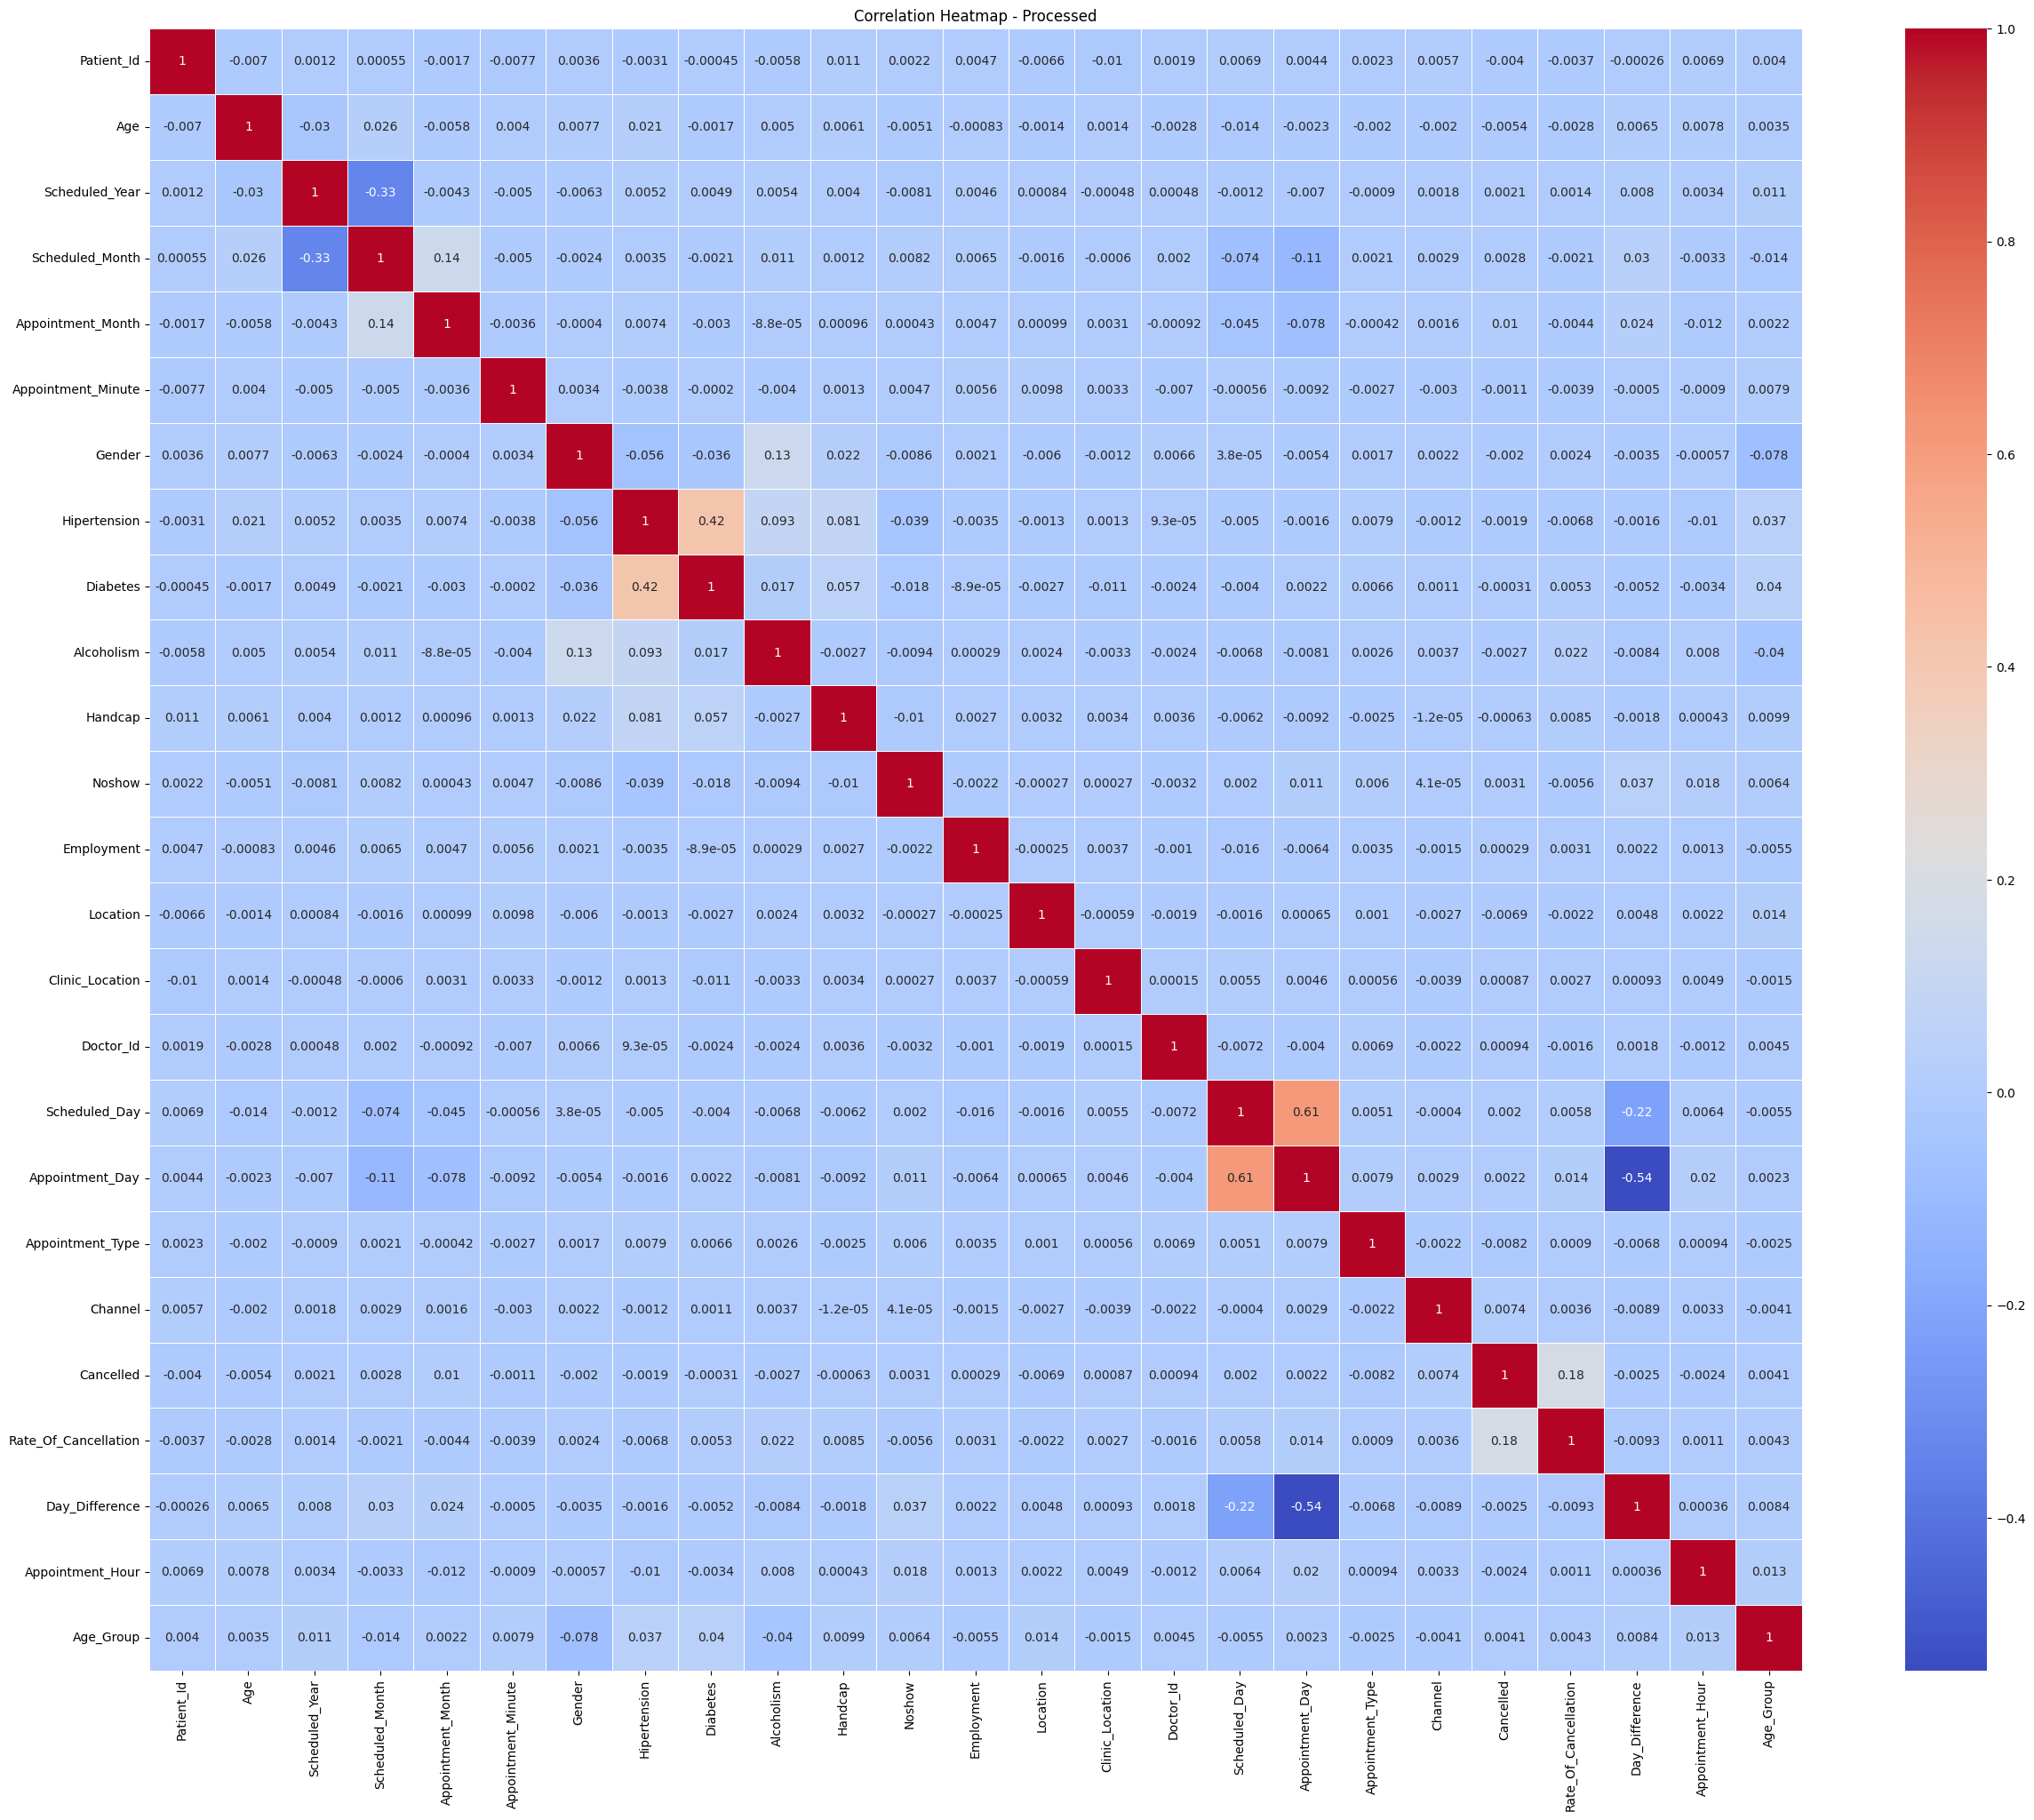

Most correlated features: {'Cancelled', 'Scheduled_Month', 'Scheduled_Year', 'Diabetes', 'Appointment_Day', 'Day_Difference', 'Alcoholism', 'Hipertension', 'Scheduled_Day', 'Appointment_Month', 'Rate_Of_Cancellation', 'Gender'}


In [10]:
correlation_matrix = df.corr(numeric_only=True)
columns_to_remove = ["Appointment_Year"]
correlation_matrix.drop(columns=columns_to_remove, index=columns_to_remove, inplace=True)
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Processed')
plt.show()

# Set the correlation threshold
correlation_threshold = 0.1  # Adjust this threshold as needed

# Create a set to store the highly correlated features
highly_correlated_features = set()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Add the feature names to the set
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)
            highly_correlated_features.add(feature_j)

# Print the highly correlated features
print("Most correlated features:", highly_correlated_features)

After converting the categorical features, we can see that `Scheduled_Day`, `Scheduled_Month`, `Rate_Of_Cancellation`, `Alcoholism`, `Cancelled`, `Scheduled_Year`, `Appointment_Day`, `Gender`, `Diabetes`, `Hipertension`, `Appointment_Month`, and `Day_Difference` are all the features that show correlation. Thus these are suitable features to select for training.

In [11]:
# Data Cleaning and Feature Selection
selected_features = list(highly_correlated_features)+['Noshow']
"""['Age', 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
                     'Cancelled', 'Rate_Of_Cancellation', 'Noshow', 'Scheduled_Day', 
                     'Appointment_Day', 'Channel']"""

df = df[selected_features]
df.drop_duplicates(inplace=True)
df.dropna(inplace=True) 
# df.to_csv('noshow_data_v3.csv', index=False)

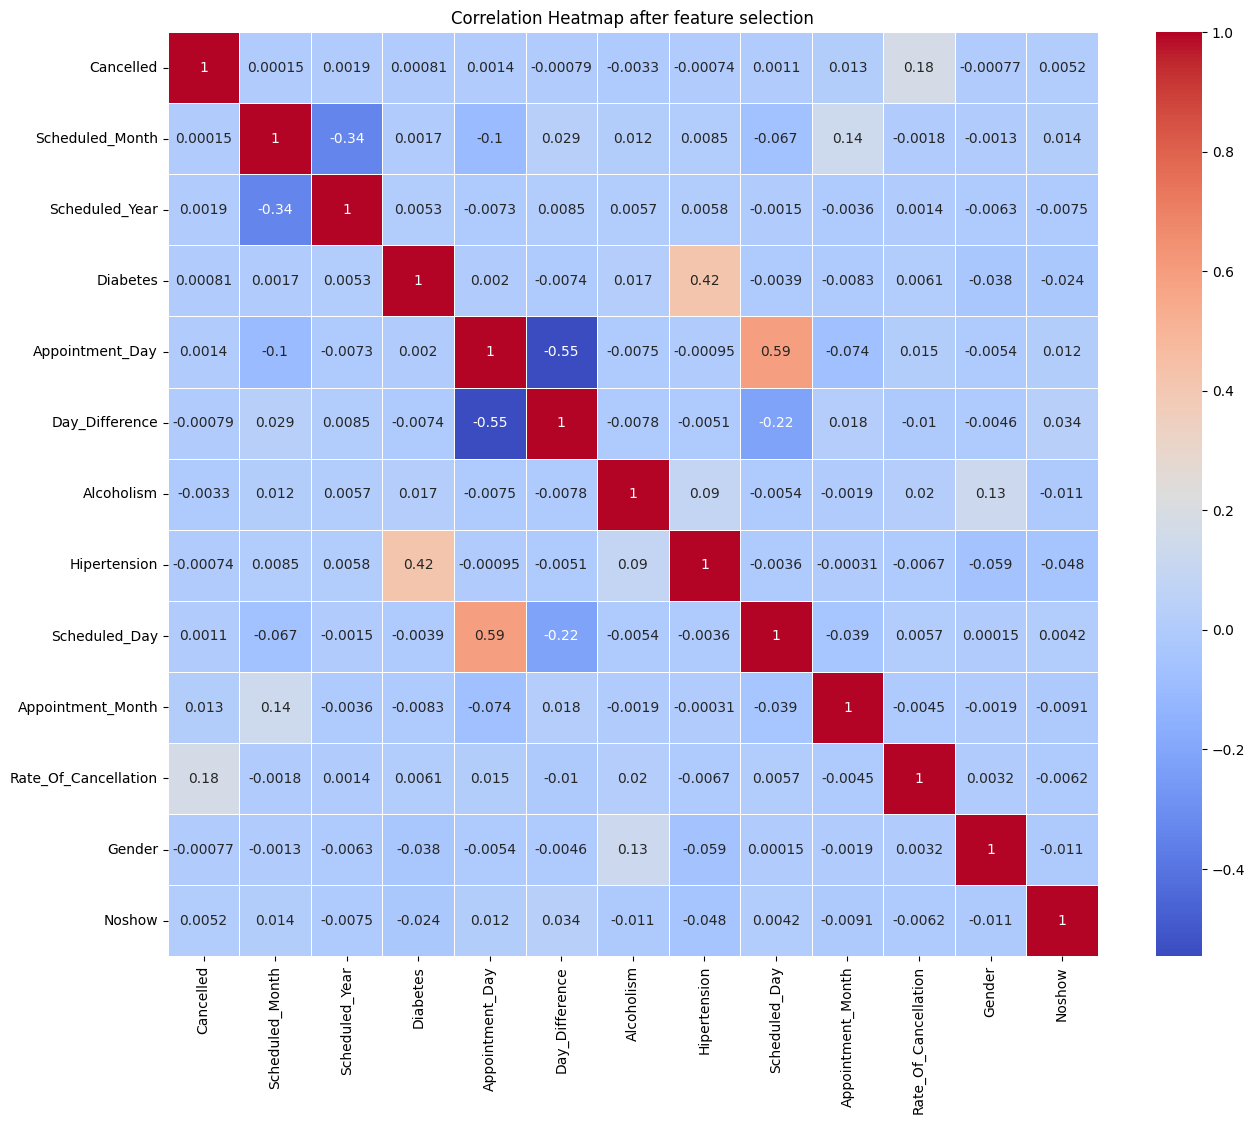

In [12]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap after feature selection')
plt.show()


--------------------------------
## Post Processing EDA
We re-examine our data to notice its current state, beforw it can be used in training.

In [13]:
#Post Processing Exploratory Data Analysis
print("Head:")
display(df.head(10))
print("=========================")
print("Info:",df.info(),"=========================")
print("Description:")
display(df.describe())
print("=========================")
print("Null values\n", df.isnull().sum(),"\n=========================")
print("Dupicates:", df.duplicated().sum(),"\n=========================")

Head:


,Cancelled,Scheduled_Month,Scheduled_Year,Diabetes,Appointment_Day,Day_Difference,Alcoholism,Hipertension,Scheduled_Day,Appointment_Month,Rate_Of_Cancellation,Gender,Noshow
0,1.0,4.0,2016.0,0.0,28.0,0.0,0.0,1.0,28.0,4.0,348.0,0.0,0.0
1,1.0,4.0,2016.0,0.0,28.0,0.0,0.0,0.0,28.0,4.0,176.0,1.0,0.0
2,0.0,4.0,2016.0,0.0,28.0,0.0,0.0,0.0,28.0,4.0,159.0,0.0,0.0
3,0.0,4.0,2016.0,0.0,28.0,0.0,0.0,0.0,28.0,4.0,232.0,0.0,0.0
4,1.0,4.0,2016.0,1.0,28.0,0.0,0.0,1.0,28.0,4.0,144.0,0.0,0.0
5,1.0,4.0,2016.0,0.0,28.0,2.0,0.0,1.0,26.0,4.0,88.0,0.0,0.0
6,0.0,4.0,2016.0,0.0,28.0,2.0,0.0,0.0,26.0,4.0,266.0,0.0,1.0
7,1.0,4.0,2016.0,0.0,28.0,2.0,0.0,0.0,26.0,4.0,223.0,0.0,1.0
8,0.0,4.0,2016.0,0.0,28.0,0.0,0.0,0.0,28.0,4.0,204.0,0.0,0.0
9,0.0,4.0,2016.0,0.0,28.0,2.0,0.0,0.0,26.0,4.0,123.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44940 entries, 0 to 49342
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelled             44940 non-null  float64
 1   Scheduled_Month       44940 non-null  float64
 2   Scheduled_Year        44940 non-null  float64
 3   Diabetes              44940 non-null  float64
 4   Appointment_Day       44940 non-null  float64
 5   Day_Difference        44940 non-null  float64
 6   Alcoholism            44940 non-null  float64
 7   Hipertension          44940 non-null  float64
 8   Scheduled_Day         44940 non-null  float64
 9   Appointment_Month     44940 non-null  float64
 10  Rate_Of_Cancellation  44940 non-null  float64
 11  Gender                44940 non-null  float64
 12  Noshow                44940 non-null  float64
dtypes: float64(13)
memory usage: 4.8 MB
Info: None =========================
Description:


,Cancelled,Scheduled_Month,Scheduled_Year,Diabetes,Appointment_Day,Day_Difference,Alcoholism,Hipertension,Scheduled_Day,Appointment_Month,Rate_Of_Cancellation,Gender,Noshow
count,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000
mean,0.600445,4.607543,2015.999177,0.075389,14.783845,39.526680,0.037428,0.218380,14.463173,6.048175,251.918914,0.354028,0.216133
std,0.489812,0.622162,0.028682,0.264022,9.738514,60.545754,0.189810,0.413151,8.857094,2.407933,112.925567,0.478223,0.411610
min,0.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2016.000000,0.000000,4.000000,0.000000,0.000000,0.000000,8.000000,5.000000,168.000000,0.000000,0.000000
50%,1.000000,5.000000,2016.000000,0.000000,16.000000,7.000000,0.000000,0.000000,14.000000,5.000000,256.000000,0.000000,0.000000
75%,1.000000,5.000000,2016.000000,0.000000,24.000000,38.000000,0.000000,0.000000,23.000000,6.000000,333.000000,1.000000,0.000000
max,1.000000,12.000000,2016.000000,1.000000,30.000000,243.000000,1.000000,1.000000,30.000000,12.000000,494.000000,1.000000,1.000000


Null values
 Cancelled               0
Scheduled_Month         0
Scheduled_Year          0
Diabetes                0
Appointment_Day         0
Day_Difference          0
Alcoholism              0
Hipertension            0
Scheduled_Day           0
Appointment_Month       0
Rate_Of_Cancellation    0
Gender                  0
Noshow                  0
dtype: int64 
Dupicates: 0 


From reviewing the data after pre-processing, we can see that there are now 13 columns, meaning 10 columns have been removed by feature selection. There are 44940 entries, meaning 6233 entries have been dropped. All features are now float. 

--------------------------------------------
## Training, Testing and Validation
We train the data on various models, sampling techniques and assess their performances

In [14]:
X = df.drop('Noshow', axis=1)
y = df['Noshow']

In [15]:
# Define the models you want to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000), 
	"Decision Tree" : DecisionTreeClassifier(random_state=42),
	"K-Nearest Neighbors" : KNeighborsClassifier(),
	"Neural Network (MLP)" : MLPClassifier(random_state=42, max_iter=1000),
	"AdaBoost" : AdaBoostClassifier(random_state=42)
}

best_models = []
best_objs = []

In [16]:
"""
Gives a score on the overall performance of a model based on its confusion matrix. Scale 0-10    
"""
def custom_evaluation_score(cm):
    tn, fp, fn, tp = cm.ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracy = (tp+tn)/(tp + tn + fp + fn) if (tp + tn + fp + fn)>0 else 0
    f_measure = 2 * precision * recall/(precision + recall) if (precision + recall)>0 else 0

    custom_score = (precision + recall + accuracy + f_measure) / 4

    scaled_score = custom_score * 10

    return scaled_score

In [17]:
"""
Takes train, test dataframes and trains the aformentioned models on them.
Prints out the most successful model (by accuracy) and gives further details on performance.
"""
def evaluate_models(X_train, y_train, X_test, y_test, models):
    best_model = None
    best_accuracy = 0.0
    best_model_obj = None
    results = []
    eval_start = time.time()
    for model_name, model in models.items():
        print(f"Model: {model_name} -", end=" ")

        start_time = time.time()
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
        confusion = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {accuracy:.4f} -", end=" ")
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        mins = int(elapsed_time // 60)
        secs = int(elapsed_time % 60)
        if mins>0: print(f"Time: {mins}m {secs}s")
        else: print(f"Time: {secs}s")
        
        if (1.0 in confusion.ravel() or 0.0 in confusion.ravel()): alert = "!"
        else: alert = "✓"

        if accuracy > best_accuracy and alert!='!':
            best_accuracy = accuracy
            best_model = model_name
            best_model_obj = model
        
        result = {
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision_0": report["0.0"]["precision"],
            "Recall_0": report["0.0"]["recall"],
            "F1_0": report["0.0"]["f1-score"],
            "Precision_1": report["1.0"]["precision"],
            "Recall_1": report["1.0"]["recall"],
            "F1_1": report["1.0"]["f1-score"],
            "Confusion Matrix" : confusion,
            "Overall Score" : custom_evaluation_score(confusion),
            "Alert" : alert
        }
        
        
        results.append(result)
        
    
    eval_end = time.time()
    eval_time = eval_end - eval_start
    print(f"---------------\nEvaluation Time: {eval_time//60:.0f}m {eval_time%60:.0f}s")
    print("===============")
    print(f"Best Performing Model: {best_model} with Accuracy: {best_accuracy:.4f}")
    print("===============\nDetails:")
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Accuracy", ascending=False)
    display(results_df)
    return [best_model, best_accuracy, best_model_obj]

In [18]:
#Undersampling majority classes - Randomly
undersampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

best_model, best_accuracy, best_obj = evaluate_models(X_train, y_train, X_test, y_test, models)

best_models.append(["Random Undersampling", best_model, best_accuracy])
best_objs.append(["Random Undersampling", best_model, best_obj])

Model: Random Forest - Accuracy: 0.5860 - Time: 1s
Model: Gradient Boosting - Accuracy: 0.6271 - Time: 0s
Model: XGBoost - Accuracy: 0.6230 - Time: 0s
Model: Logistic Regression - Accuracy: 0.5371 - Time: 0s
Model: Decision Tree - Accuracy: 0.5546 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.5717 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.5021 - Time: 1s
Model: AdaBoost - Accuracy: 0.6168 - Time: 0s
---------------
Evaluation Time: 0m 5s
Best Performing Model: Gradient Boosting with Accuracy: 0.6271
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
1,Gradient Boosting,0.627145,0.654932,0.546075,0.595570,0.607090,0.709110,0.654146,"[[1600, 1330], [843, 2055]]",6.493727,✓
2,XGBoost,0.623027,0.639619,0.573038,0.604500,0.609429,0.673568,0.639895,"[[1679, 1251], [946, 1952]]",6.364796,✓
7,AdaBoost,0.616850,0.644306,0.531058,0.582226,0.597422,0.703589,0.646173,"[[1556, 1374], [859, 2039]]",6.410083,✓
0,Random Forest,0.585964,0.595002,0.552560,0.572996,0.578050,0.619738,0.598168,"[[1619, 1311], [1102, 1796]]",5.954800,✓
5,K-Nearest Neighbors,0.571723,0.575715,0.563140,0.569358,0.567860,0.580400,0.574061,"[[1650, 1280], [1216, 1682]]",5.735110,✓
4,Decision Tree,0.554564,0.558638,0.543003,0.550710,0.550671,0.566253,0.558353,"[[1591, 1339], [1257, 1641]]",5.574603,✓
3,Logistic Regression,0.537062,0.542305,0.507509,0.524330,0.532404,0.566943,0.549131,"[[1487, 1443], [1255, 1643]]",5.463851,✓
6,Neural Network (MLP),0.502059,0.502416,0.993515,0.667354,0.441176,0.005176,0.010232,"[[2911, 19], [2883, 15]]",2.396609,✓


In [19]:
#Undersampling - Edited Nearest Neighbours method
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

best_model, best_accuracy, best_obj = evaluate_models(X_train, y_train, X_test, y_test, models)

best_models.append(["ENN Undersampling", best_model, best_accuracy])
best_objs.append(["ENN Undersampling", best_model, best_obj])

Model: Random Forest - Accuracy: 0.7105 - Time: 2s
Model: Gradient Boosting - Accuracy: 0.7222 - Time: 1s
Model: XGBoost - Accuracy: 0.7432 - Time: 0s
Model: Logistic Regression - Accuracy: 0.6693 - Time: 0s
Model: Decision Tree - Accuracy: 0.7031 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.7684 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.6698 - Time: 1s
Model: AdaBoost - Accuracy: 0.7078 - Time: 0s
---------------
Evaluation Time: 0m 6s
Best Performing Model: K-Nearest Neighbors with Accuracy: 0.7684
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
5,K-Nearest Neighbors,0.768448,0.788336,0.894282,0.837973,0.705628,0.513476,0.594408,"[[5177, 612], [1390, 1467]]",6.454899,✓
2,XGBoost,0.743234,0.783299,0.852306,0.816347,0.635705,0.522226,0.573405,"[[4934, 855], [1365, 1492]]",6.186426,✓
1,Gradient Boosting,0.722184,0.757723,0.860079,0.805663,0.609639,0.442772,0.512976,"[[4979, 810], [1592, 1265]]",5.718927,✓
0,Random Forest,0.710502,0.770230,0.808948,0.789114,0.568979,0.511026,0.538447,"[[4683, 1106], [1397, 1460]]",5.822385,✓
7,AdaBoost,0.707842,0.733438,0.885472,0.802316,0.599879,0.347917,0.440408,"[[5126, 663], [1863, 994]]",5.240115,✓
4,Decision Tree,0.703100,0.774073,0.785973,0.779978,0.552384,0.535177,0.543644,"[[4550, 1239], [1328, 1529]]",5.835763,✓
6,Neural Network (MLP),0.669789,0.669792,0.999655,0.802135,0.666667,0.001400,0.002794,"[[5787, 2], [2853, 4]]",3.351626,✓
3,Logistic Regression,0.669327,0.669599,0.999136,0.801830,0.375000,0.001050,0.002094,"[[5784, 5], [2854, 3]]",2.618678,✓


In [20]:
#Oversampling minority classes - SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

best_model, best_accuracy, best_obj = evaluate_models(X_train, y_train, X_test, y_test, models)

best_models.append(["SMOTE Oversampling", best_model, best_accuracy])
best_objs.append(["SMOTE Oversampling", best_model, best_obj])

Model: Random Forest - Accuracy: 0.8295 - Time: 5s
Model: Gradient Boosting - Accuracy: 0.8328 - Time: 5s
Model: XGBoost - Accuracy: 0.8502 - Time: 0s
Model: Logistic Regression - Accuracy: 0.5413 - Time: 0s
Model: Decision Tree - Accuracy: 0.7862 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.7163 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.5076 - Time: 8s
Model: AdaBoost - Accuracy: 0.8127 - Time: 1s
---------------
Evaluation Time: 0m 23s
Best Performing Model: XGBoost with Accuracy: 0.8502
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
2,XGBoost,0.850215,0.781470,0.970337,0.865722,0.961372,0.731236,0.830659,"[[10206, 312], [2854, 7765]]",8.433706,✓
1,Gradient Boosting,0.832805,0.748931,0.998859,0.856025,0.998312,0.668330,0.800654,"[[10506, 12], [3522, 7097]]",8.250254,✓
0,Random Forest,0.829541,0.794481,0.886861,0.838133,0.873350,0.772766,0.819985,"[[9328, 1190], [2413, 8206]]",8.239104,✓
7,AdaBoost,0.812651,0.737128,0.969101,0.837345,0.955534,0.657689,0.779116,"[[10193, 325], [3635, 6984]]",8.012476,✓
4,Decision Tree,0.786157,0.789255,0.778000,0.783587,0.783174,0.794237,0.788667,"[[8183, 2335], [2185, 8434]]",7.880585,✓
5,K-Nearest Neighbors,0.716280,0.784232,0.592983,0.675329,0.675288,0.838403,0.748057,"[[6237, 4281], [1716, 8903]]",7.445069,✓
3,Logistic Regression,0.541278,0.540485,0.521677,0.530914,0.542012,0.560693,0.551194,"[[5487, 5031], [4665, 5954]]",5.487944,✓
6,Neural Network (MLP),0.507641,0.502732,0.971097,0.662494,0.629268,0.048592,0.090218,"[[10214, 304], [10103, 516]]",3.189297,✓


In [21]:
#ENN then SMOTE
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

best_model, best_accuracy, best_obj = evaluate_models(X_train, y_train, X_test, y_test, models)

best_models.append(["ENN-SMOTE", best_model, best_accuracy])
best_objs.append(["ENN-SMOTE", best_model, best_obj])

Model: Random Forest - Accuracy: 0.7745 - Time: 2s
Model: Gradient Boosting - Accuracy: 0.7751 - Time: 2s
Model: XGBoost - Accuracy: 0.8004 - Time: 0s
Model: Logistic Regression - Accuracy: 0.5607 - Time: 0s
Model: Decision Tree - Accuracy: 0.7576 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.8051 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.5083 - Time: 2s
Model: AdaBoost - Accuracy: 0.7422 - Time: 0s
---------------
Evaluation Time: 0m 10s
Best Performing Model: K-Nearest Neighbors with Accuracy: 0.8051
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
5,K-Nearest Neighbors,0.805059,0.799449,0.812467,0.805905,0.810811,0.797706,0.804205,"[[4640, 1071], [1164, 4590]]",8.044452,✓
2,XGBoost,0.800436,0.780804,0.833304,0.806200,0.822719,0.767814,0.794319,"[[4759, 952], [1336, 4418]]",7.963218,✓
1,Gradient Boosting,0.775055,0.765424,0.790755,0.777883,0.785265,0.759472,0.772153,"[[4516, 1195], [1384, 4370]]",7.729861,✓
0,Random Forest,0.774531,0.764378,0.791280,0.777596,0.785341,0.757908,0.771381,"[[4519, 1192], [1393, 4361]]",7.722901,✓
4,Decision Tree,0.757610,0.753721,0.762563,0.758116,0.761561,0.752694,0.757102,"[[4355, 1356], [1423, 4331]]",7.572418,✓
7,AdaBoost,0.742172,0.718964,0.791980,0.753708,0.770390,0.692735,0.729502,"[[4523, 1188], [1768, 3986]]",7.337000,✓
3,Logistic Regression,0.560663,0.562570,0.530555,0.546094,0.558974,0.590546,0.574326,"[[3030, 2681], [2356, 3398]]",5.711270,✓
6,Neural Network (MLP),0.508330,0.503536,0.922605,0.651499,0.558442,0.097150,0.165507,"[[5269, 442], [5195, 559]]",3.323570,✓


In [22]:
#SMOTE then ENN
smoteenn = SMOTEENN(sampling_strategy='auto',random_state=42)

X_resampled, y_resampled = smoteenn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

best_model, best_accuracy, best_obj = evaluate_models(X_train, y_train, X_test, y_test, models)

best_models.append(["SMOTE-ENN", best_model, best_accuracy])
best_objs.append(["SMOTE-ENN", best_model, best_obj])

Model: Random Forest - Accuracy: 0.8728 - Time: 2s
Model: Gradient Boosting - Accuracy: 0.8523 - Time: 3s
Model: XGBoost - Accuracy: 0.8870 - Time: 0s
Model: Logistic Regression - Accuracy: 0.6094 - Time: 0s
Model: Decision Tree - Accuracy: 0.8573 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.8948 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.6106 - Time: 1s
Model: AdaBoost - Accuracy: 0.8322 - Time: 1s
---------------
Evaluation Time: 0m 10s
Best Performing Model: K-Nearest Neighbors with Accuracy: 0.8948
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
5,K-Nearest Neighbors,0.894818,0.927425,0.800213,0.859136,0.877578,0.958108,0.916076,"[[3757, 938], [294, 6724]]",9.116448,✓
2,XGBoost,0.886963,0.845036,0.879233,0.861795,0.916960,0.892135,0.904377,"[[4128, 567], [757, 6261]]",9.001085,✓
0,Random Forest,0.872791,0.833368,0.853248,0.843191,0.900232,0.885865,0.892991,"[[4006, 689], [801, 6217]]",8.879695,✓
4,Decision Tree,0.857253,0.823870,0.818956,0.821406,0.879364,0.882873,0.881115,"[[3845, 850], [822, 6196]]",8.751511,✓
1,Gradient Boosting,0.852301,0.806238,0.831310,0.818582,0.884750,0.866344,0.875450,"[[3903, 792], [938, 6080]]",8.697111,✓
7,AdaBoost,0.832238,0.785684,0.799574,0.792568,0.864311,0.854089,0.859170,"[[3754, 941], [1024, 5994]]",8.524522,✓
6,Neural Network (MLP),0.610604,0.561694,0.129925,0.211036,0.615602,0.932174,0.741513,"[[610, 4085], [476, 6542]]",7.249732,✓
3,Logistic Regression,0.609408,0.555147,0.128647,0.208888,0.614965,0.931034,0.740690,"[[604, 4091], [484, 6534]]",7.240245,✓


In [23]:
#Hyperparameter Tuning
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)

X_resampled, y_resampled = smoteenn.fit_resample(X_resampled, y_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

xgb = XGBClassifier(random_state=42)

#Grid Search
grid_start = time.time()
param_grid = {
    'n_estimators': [100, 150, 250],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_

best_xgb_grid = XGBClassifier(random_state=42, **best_params_grid)
best_xgb_grid.fit(X_train, y_train)
y_pred_grid = best_xgb_grid.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
report_grid = classification_report(y_test, y_pred_grid, zero_division=1, output_dict=True)
confusion_grid = confusion_matrix(y_test, y_pred_grid)

grid_end = time.time()
grid_time = grid_end - grid_start
print(f"Grid search completed. Time: {grid_time//60:.0f}m {grid_time%60:.0f}s")

#Random Search
rand_start = time.time()
param_dist = {
    'n_estimators': stats.randint(50, 250),
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.7, 0.3),
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_xgb_random = XGBClassifier(random_state=42, **best_params_random)
best_xgb_random.fit(X_train, y_train)

y_pred_random = best_xgb_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
report_random = classification_report(y_test, y_pred_random, zero_division=1, output_dict=True)
confusion_random = confusion_matrix(y_test, y_pred_random)

rand_end = time.time()
rand_time = rand_end - rand_start
print(f"Random search completed. Time: {rand_time//60:.0f}m {rand_time%60:.0f}s")

#Results
grid_search_result = {
    "Model": "XGBoost (Grid Search)",
    "Accuracy": accuracy_grid,
    "Precision_0": report_grid["0.0"]["precision"],
    "Recall_0": report_grid["0.0"]["recall"],
    "F1_0": report_grid["0.0"]["f1-score"],
    "Precision_1": report_grid["1.0"]["precision"],
    "Recall_1": report_grid["1.0"]["recall"],
    "F1_1": report_grid["1.0"]["f1-score"],
    "Confusion Matrix": confusion_grid,
    "Overall Score" : custom_evaluation_score(confusion_grid)
}

random_search_result = {
    "Model": "XGBoost (Random Search)",
    "Accuracy": accuracy_random,
    "Precision_0": report_random["0.0"]["precision"],
    "Recall_0": report_random["0.0"]["recall"],
    "F1_0": report_random["0.0"]["f1-score"],
    "Precision_1": report_random["1.0"]["precision"],
    "Recall_1": report_random["1.0"]["recall"],
    "F1_1": report_random["1.0"]["f1-score"],
    "Confusion Matrix": confusion_random,
    "Overall Score" : custom_evaluation_score(confusion_random)
}

results_df = pd.DataFrame([grid_search_result, random_search_result])
display(results_df)

best_models.append(["Hyperparameter Tuning", "Random search", accuracy_random])
best_objs.append(["Hyperparameter Tuning", "Random search", best_xgb_random])

Grid search completed. Time: 0m 17s
Random search completed. Time: 0m 30s


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score
0,XGBoost (Grid Search),0.868660,0.857311,0.886535,0.871678,0.880971,0.850555,0.865496,"[[3641, 466], [606, 3449]]",8.664202
1,XGBoost (Random Search),0.889733,0.880788,0.903092,0.891801,0.899266,0.876202,0.887584,"[[3709, 398], [502, 3553]]",8.881964


In [24]:
#Trying Recursive feature elimination
from sklearn.feature_selection import RFECV

df = pd.read_csv("noshow_data_v2 (1).csv")
df = preprocess(df)
X = df.drop(['Noshow', 'Scheduled_Date', 'Appointment_Date', 'Appointment_time'], axis=1)
y = df['Noshow']

X_resampled, y_resampled = smoteenn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# Instantiate RFECV with the desired classifier (i.e., XGBoost)
rfecv = RFECV(estimator=XGBClassifier(random_state=42), cv=5)
rfecv.fit(X_train, y_train)

optimal_num_features = rfecv.n_features_
feature_mask = rfecv.support_

print("Optimal number of features:", optimal_num_features)
print("Selected features:", feature_mask)
X_train_selected = X_train.loc[:, feature_mask]
X_test_selected = X_test.loc[:, feature_mask]

best_model, best_accuracy, best_obj = evaluate_models(X_train_selected, y_train, X_test_selected, y_test, models)

best_models.append(["Recursive Feature Elimination", best_model, best_accuracy])
best_objs.append(["Recursive Feature Elimination", best_model, best_obj])

Optimal number of features: 18
Selected features: [ True False False  True False  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True False
  True]
Model: Random Forest - Accuracy: 0.8868 - Time: 4s
Model: Gradient Boosting - Accuracy: 0.8890 - Time: 6s
Model: XGBoost - Accuracy: 0.8846 - Time: 0s
Model: Logistic Regression - Accuracy: 0.5957 - Time: 0s
Model: Decision Tree - Accuracy: 0.8188 - Time: 0s
Model: K-Nearest Neighbors - Accuracy: 0.8102 - Time: 0s
Model: Neural Network (MLP) - Accuracy: 0.5948 - Time: 2s
Model: AdaBoost - Accuracy: 0.8684 - Time: 1s
---------------
Evaluation Time: 0m 16s
Best Performing Model: Gradient Boosting with Accuracy: 0.8890
Details:


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Confusion Matrix,Overall Score,Alert
1,Gradient Boosting,0.888995,0.801035,0.965169,0.875475,0.972542,0.837298,0.899867,"[[4489, 162], [1115, 5738]]",8.996754,✓
0,Random Forest,0.886822,0.801007,0.958074,0.872528,0.967177,0.838465,0.898234,"[[4456, 195], [1107, 5746]]",8.976744,✓
2,XGBoost,0.884562,0.814857,0.924532,0.866237,0.943633,0.857435,0.898471,"[[4300, 351], [977, 5876]]",8.960250,✓
7,AdaBoost,0.868394,0.808214,0.884326,0.844559,0.916134,0.857581,0.885891,"[[4113, 538], [976, 5877]]",8.819998,✓
4,Decision Tree,0.818846,0.788622,0.754031,0.770939,0.837891,0.862834,0.850180,"[[3507, 1144], [940, 5913]]",8.424376,✓
5,K-Nearest Neighbors,0.810240,0.810206,0.692969,0.747016,0.810258,0.889829,0.848181,"[[3223, 1428], [755, 6098]]",8.396271,✓
3,Logistic Regression,0.595706,1.000000,0.000000,0.000000,0.595706,1.000000,0.746636,"[[0, 4651], [0, 6853]]",7.345120,!
6,Neural Network (MLP),0.594837,0.481481,0.027951,0.052835,0.597561,0.979571,0.742301,"[[130, 4521], [140, 6713]]",7.285674,✓


In [25]:
best_models_df = pd.DataFrame(best_models)
best_models_df.rename(columns={0: "Technique", 1: "Model", 2: "Accuracy"}, inplace=True)
best_models_df = best_models_df.sort_values(by="Accuracy", ascending=False)
display(best_models_df)

,Technique,Model,Accuracy
4,SMOTE-ENN,K-Nearest Neighbors,0.894818
5,Hyperparameter Tuning,Random search,0.889733
6,Recursive Feature Elimination,Gradient Boosting,0.888995
2,SMOTE Oversampling,XGBoost,0.850215
3,ENN-SMOTE,K-Nearest Neighbors,0.805059
1,ENN Undersampling,K-Nearest Neighbors,0.768448
0,Random Undersampling,Gradient Boosting,0.627145


-----------
## Testing Custom Data
We synthesise 5 rows of data, add it with 5 random rows from the original dataset and feed it to the best models to test their accuracies.

In [26]:
"""
Scores predictions against original values to test custom data with.   
"""
def scorer(results, answers):
    val = 0
    for i in range(len(results)):
        if results[i]==answers[i]: val+=1
    return val

In [27]:
fake = Faker()

synthetic_data = pd.DataFrame()

num_synthetic_rows = 5

for _ in range(num_synthetic_rows):
    row = {
        "Patient_Id": random.uniform(100000, 999999),
        "Gender": random.choice(["F", "M"]),
        "Scheduled_Date": fake.date_between(start_date="-365d", end_date="-1d").strftime("%Y-%m-%d"),
        "Appointment_Date": fake.date_between(start_date="today", end_date="+7d").strftime("%Y-%m-%d"),
        "Appointment_time": fake.time(pattern="%H:%M:%S"),
        "Age": random.randint(1, 100),
        "Hipertension": random.randint(0, 1),
        "Diabetes": random.randint(0, 1),
        "Alcoholism": random.randint(0, 1),
        "Handcap": random.randint(0, 4),
        "Noshow": random.choice(["No", "Yes"]),
        "Employment": random.choice(["Business", "Salaried", "Non Employed"]),
        "Location": fake.city(),
        "Clinic_Location": fake.city(),
        "Doctor_Id": random.randint(1000, 9999),
        "Scheduled_Day": fake.day_of_week(),
        "Appointment_Day": fake.day_of_week(),
        "Appointment_Type": random.choice(["New Patient", "Follow-up Visit"]),
        "Channel": random.choice(["Call", "Web Portal", "SMS", "Email"]),
        "Cancelled": random.randint(0, 1),
        "Rate_Of_Cancellation": random.uniform(0, 1),
        "Day_Difference": f"{random.randint(0, 7)} days",
        "Appointment_Hour": random.randint(0, 23),
    }
    
    synthetic_data = pd.concat([synthetic_data, pd.DataFrame([row])], ignore_index=True)

answers = list(synthetic_data['Noshow'])

sample_df_synthetic = pd.DataFrame(synthetic_data)

data = {
    "Patient_Id": [999.0, 846000.0, 148000.0, 171000.0, 72200.0],
    "Gender": ["F", "M", "F", "F", "F"],
    "Scheduled_Date": ["2016-04-26", "2016-04-28", "2016-04-28", "2016-04-26", "2016-04-29"],
    "Appointment_Date": ["2016-04-29", "2016-04-29", "2016-04-29", "2016-04-29", "2016-04-29"],
    "Appointment_time": ["16:08:00", "16:34:00", "12:54:00", "11:10:00", "16:33:00"],
    "Age": [15, 50, 40, 30, 46],
    "Hipertension": [0, 0, 0, 0, 0],
    "Diabetes": [0, 0, 0, 0, 0],
    "Alcoholism": [0, 0, 0, 0, 0],
    "Handcap": [0, 0, 0, 0, 0],
    "Noshow": ["No", "No", "Yes", "No", "No"],
    "Employment": ["Business", "Salaried", "Salaried", "Non Employed", "Business"],
    "Location": ["Pune", "Coimbatore", "Chennai", "Bengaluru", "Noida"],
    "Clinic_Location": ["Coimbatore", "Noida", "Pune", "Bengaluru", "Bengaluru"],
    "Doctor_Id": [3000, 4000, 5000, 2000, 4000],
    "Scheduled_Day": ["Tuesday", "Thursday", "Thursday", "Tuesday", "Friday"],
    "Appointment_Day": ["Friday", "Friday", "Friday", "Friday", "Friday"],
    "Appointment_Type": ["New Patient", "Follow-up Visit", "New Patient", "New Patient", "Follow-up Visit"],
    "Channel": ["Chatbot", "Web Portal", "Call", "Mobile Application", "Call"],
    "Cancelled": [0, 0, 1, 1, 1],
    "Rate_Of_Cancellation": [0.5, 0.5957446808510638, 0.543859649122807, 0.5882352941176471, 0.6923076923076923],
    "Day_Difference": ["3 days", "1 days", "1 days", "3 days", "0 days"],
    "Appointment_Hour": [16, 16, 12, 11, 16]
}

manual_data = pd.DataFrame(data)
answers += list(manual_data['Noshow'])

sample_df = pd.concat([manual_data.reset_index(drop=True), sample_df_synthetic.reset_index(drop=True)])
sample_df.reset_index(drop=True, inplace=True) 
sample_df = preprocess(sample_df)

In [28]:
sample_df_selected = sample_df.drop(['Appointment_Date', 'Appointment_time', 'Noshow', 'Scheduled_Date','Age', "Appointment_Hour", 'Appointment_Minute', 'Appointment_Year', 'Handcap', 'Rate_Of_Cancellation', 'Scheduled_Year'],axis=1)

for technique, name, model in best_objs[:5]:
    predictions = model.predict(sample_df_selected)
    predictions = ["Yes" if pred == 1 else "No" for pred in predictions]
    print(technique, "-", name)
    print("Predicted Outcome:", predictions,end="\t")
    print("Answers:",answers)
    print("Score: ",scorer(predictions, answers),"/10","\n---",sep="")
    
sample_df_selected = sample_df[selected_features].copy()
sample_df_selected.drop('Noshow',inplace=True,axis=1)
predictions = best_objs[5][2].predict(sample_df_selected)
predictions = ["Yes" if pred == 1 else "No" for pred in predictions]
print(best_objs[5][0], "-", best_objs[5][1])
print("Predicted Outcome:", predictions, end="\t")
print("Answers:",answers)
print("Score:",scorer(predictions, answers),"/10","\n---")

sample_df_selected = sample_df.drop(['Noshow', 'Scheduled_Date', 'Appointment_Date', 'Appointment_time'], axis=1).copy()
sample_df_selected = sample_df_selected.loc[:, feature_mask]
predictions = best_objs[-1][2].predict(sample_df_selected)
predictions = ["Yes" if pred == 1 else "No" for pred in predictions]
print(best_objs[-1][0], "-", best_objs[-1][1])
print("Predicted Outcome:", predictions, end="\t")
print("Answers:",answers)
print("Score:",scorer(predictions, answers),"/10")

Random Undersampling - Gradient Boosting
Predicted Outcome: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']	Answers: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
Score: 9/10
---
ENN Undersampling - K-Nearest Neighbors
Predicted Outcome: ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']	Answers: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
Score: 7/10
---
SMOTE Oversampling - XGBoost
Predicted Outcome: ['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No']	Answers: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
Score: 8/10
---
ENN-SMOTE - K-Nearest Neighbors
Predicted Outcome: ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']	Answers: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
Score: 7/10
---
SMOTE-ENN - K-Nearest Neighbors
Predicted Outcome: ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']	Answers: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']


In [29]:
total_end = time.time()
total_time = int(total_end - total_start)
print(f"Total time elapsed: {total_time//60}m {total_time%60}s")

Total time elapsed: 2m 51s


------------
## Conclusion:
From all the code above, we sucessfully explored, visualised and preprocessed the dataset.
We then implemented various models across multiple sampling and selection techniques. The best performing of those are as below:
- Random Undersampling: Gradient Boosting with Accuracy: 0.627145	
- ENN Undersampling: K-Nearest Neighbors with Accuracy: 0.768448
- SMOTE Oversampling: XGBoost with Accuracy: 0.850215
- ENN-SMOTE: K-Nearest Neighbors: 0.805059
- SMOTE-ENN: K-Nearest Neighbors: 0.894818
- Hyperparameter Tuning: Random Search with Accuracy: 0.889733
- Recursive Feature Elimination: Random Forest with Accuracy: 0.888995

From these results, we can recognise that the best combinations of sampling and models is SMOTE-ENN with K-Nearest Neighbors.

Upon testing these models with a mix of synthetic and manual data, we can see that the prediction scores are as follows:
- Random Undersampling: Gradient Boosting 9/10	
- ENN Undersampling: K-Nearest Neighbors 7/10
- SMOTE Oversampling: XGBoost with Accuracy: 8/10
- ENN-SMOTE: K-Nearest Neighbors: 7/10
- SMOTE-ENN: K-Nearest Neighbors: 7/10
- Hyperparameter Tuning: Random Search 5/10
- Recursive Feature Elimination: Random Forest 9/10

From these results, we can see that the best testing model is K-Nearset Neighbours trained with ENN, SMOTE-ENN, ENN-SMOTE.